In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq '/content/drive/MyDrive/Colab Notebooks/archive (2).zip'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/archive (2).zip, /content/drive/MyDrive/Colab Notebooks/archive (2).zip.zip or /content/drive/MyDrive/Colab Notebooks/archive (2).zip.ZIP.


Predict how long patient can stay in the hospital.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Cleaning and Rearranging data

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/healthcare/train_data.csv",index_col=0)
#df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/healthcare/test_data.csv",index_col=0)
print(df_train.shape)
#print(df_test.shape)

(318438, 17)


In [3]:
df_train_hot = df_train
one_hot = pd.get_dummies(df_train_hot[['Department','Ward_Type','Type of Admission','Severity of Illness','Age']])
# Drop column B as it is now encoded
df_train_hot = df_train_hot.drop(columns=['Department','Ward_Type','Type of Admission','Severity of Illness','Age'],axis = 1)
# Join the encoded df
df_train_hot = df_train_hot.join(one_hot)

In [4]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
df_train_hot.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
case_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,F,2.0,31397,7.0,2,4911.0,0-10,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,c,5,Z,2,F,2.0,31397,7.0,2,5954.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,10,e,1,X,2,E,2.0,31397,7.0,2,4745.0,31-40,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,26,b,2,Y,2,D,2.0,31397,7.0,2,7272.0,41-50,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,26,b,2,Y,2,D,2.0,31397,7.0,2,5558.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
df_train_hot.columns.values

array(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Ward_Facility_Code', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'Stay', 'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Severity of Illness_Extreme',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate',
       'Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50',
       'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],
      dtype=object)

In [7]:
df_train.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [8]:
df_train.Hospital_region_code.unique()

array(['Z', 'X', 'Y'], dtype=object)

In [9]:
df_train.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [10]:
df_train['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [11]:
df_train['Hospital_type_code'].unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [12]:
df_train.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [13]:
df_train["Visitors with Patient"].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25])

In [14]:
df_train.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [15]:
df_train.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [16]:
df_train.Admission_Deposit.unique()

array([4911., 5954., 4745., ..., 1937., 9439., 2349.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


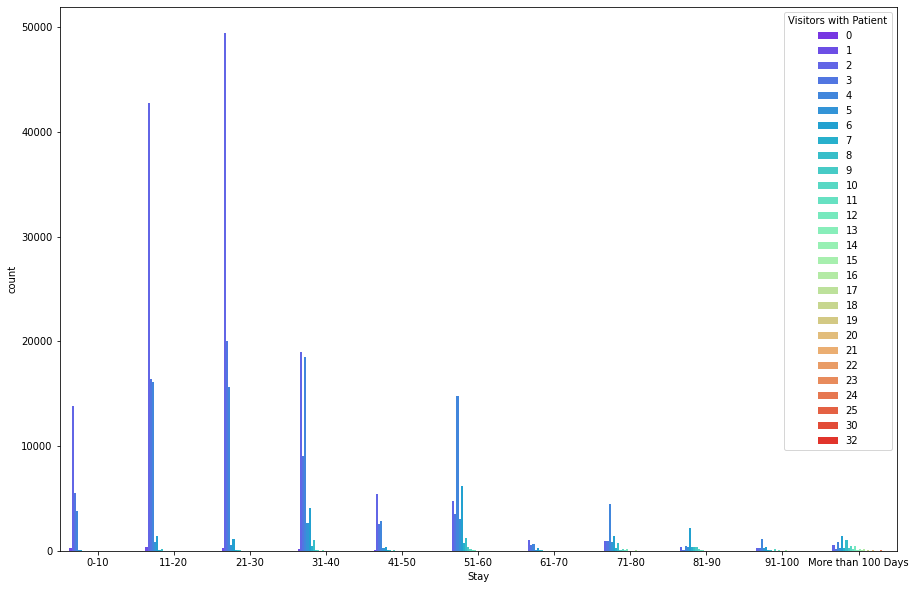

In [17]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Stay'].sort_values(),hue=df_train['Visitors with Patient'],palette='rainbow', )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf1.jpg')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


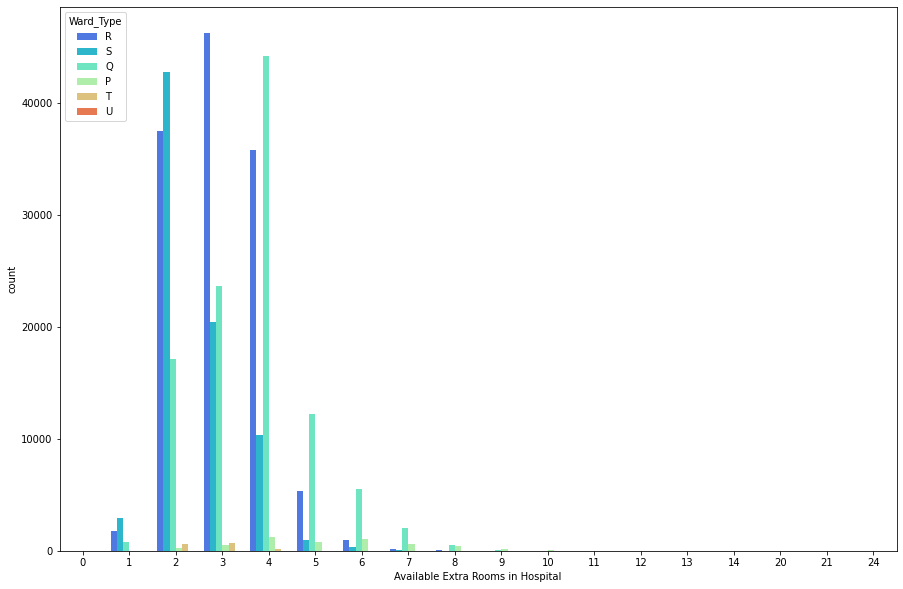

In [18]:
plt.figure(figsize = (15,10))

sns.countplot(df_train['Available Extra Rooms in Hospital'],hue=df_train['Ward_Type'],palette='rainbow', )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf2.jpg')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


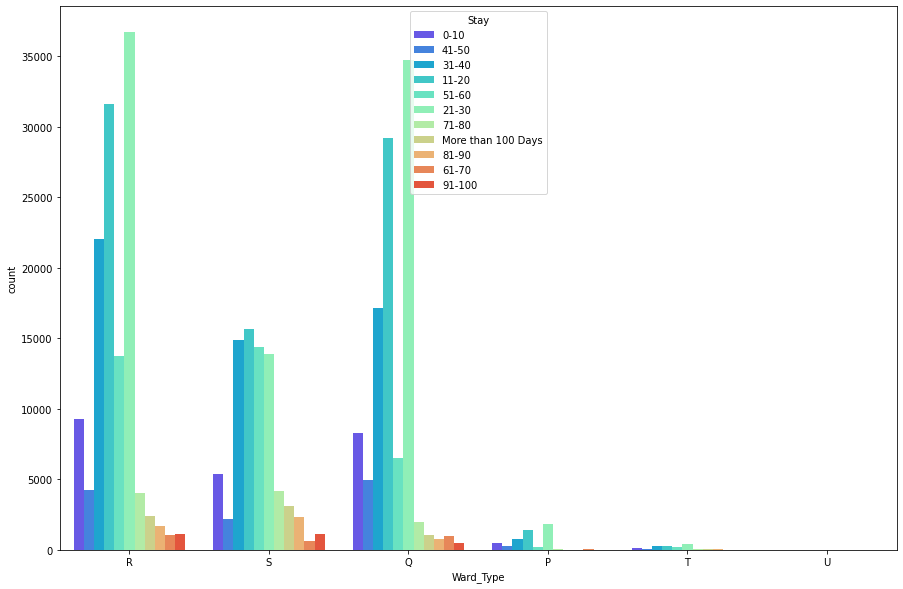

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Ward_Type'],hue=df_train['Stay'],palette='rainbow', )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf3.jpg')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


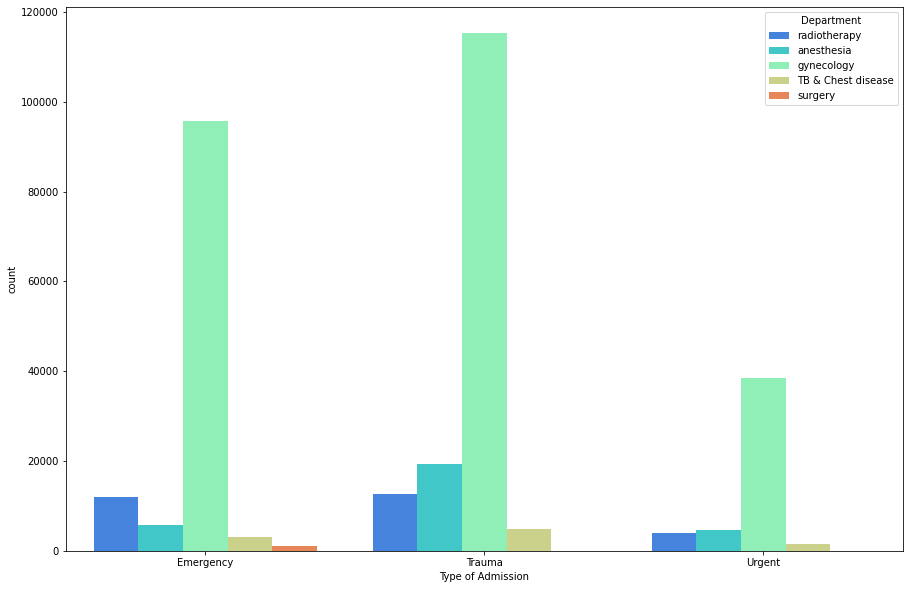

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Type of Admission'],hue=df_train['Department'],palette='rainbow')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf4.jpg')
plt.show()


Convert Healthcare data to numerical format


In [21]:
def Convert_to_Num(df):
    dept_lst = df["Department"].unique()
    dept_lst.sort()
    dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
    df.Department.replace(dept_dict, inplace=True)
    print(dept_dict)
    
    HRC_lst = df["Hospital_region_code"].unique()
    HRC_lst.sort()
    HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
    df.Hospital_region_code.replace(HRC_dict, inplace=True)
    print(HRC_dict)
    
    ward_lst = df["Ward_Type"].unique()
    ward_lst.sort()
    ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
    df.Ward_Type.replace(ward_dict, inplace=True)
    print(ward_dict)
    
    WFC_lst = df["Ward_Facility_Code"].unique()
    WFC_lst.sort()
    WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
    df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
    print(WFC_dict)
    
    TOA_lst = df["Type of Admission"].unique()
    TOA_lst.sort()
    TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
    df["Type of Admission"].replace(TOA_dict, inplace=True)
    print(TOA_dict)
   
    SOI_lst = df["Severity of Illness"].unique()
    SOI_lst.sort()
    SOI_dict = dict(zip(SOI_lst, range(len(SOI_lst))))
    df["Severity of Illness"].replace(SOI_dict, inplace=True)
    print(SOI_dict)
    
    age_lst = df["Age"].unique()
    age_lst.sort()
    age_dict = dict(zip(age_lst, range(len(age_lst))))
    df["Age"].replace(age_dict, inplace=True)
    print(age_dict)
    
    HTC_lst = df["Hospital_type_code"].unique()
    HTC_lst.sort()
    HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
    df["Hospital_type_code"].replace(HTC_dict, inplace=True)
    print(HTC_dict)
    
Convert_to_Num(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_train["Stay"].replace(dept_Stay, inplace=True)
print(dept_Stay)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


Fill empty records

In [22]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [24]:
df_train["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [25]:
df_train_hot.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Visitors with Patient                   0
Admission_Deposit                       0
Stay                                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                             0
Ward_Type_S                             0
Ward_Type_T                             0
Ward_Type_U                             0
Type of Admission_Emergency       

In [26]:
df_train_hot["Bed Grade"] = df_train_hot["Bed Grade"].fillna(2)

df_train_hot["Bed Grade"].unique()

array([2., 3., 4., 1.])

In [29]:
df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)

df_train["Bed Grade"].unique()

array([2., 3., 4., 1.])

In [30]:
df_train_hot.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Visitors with Patient                   0
Admission_Deposit                       0
Stay                                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                             0
Ward_Type_S                             0
Ward_Type_T                             0
Ward_Type_U                             0
Type of Admission_Emergency       

In [31]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Hospital_type_code,318438.0,1.256841,1.535712,0.0,0.0,1.0,2.0,6.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Hospital_region_code,318438.0,0.778098,0.752527,0.0,0.0,1.0,1.0,2.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Department,318438.0,1.943779,0.561245,0.0,2.0,2.0,2.0,4.0
Ward_Type,318438.0,1.888575,0.804655,0.0,1.0,2.0,2.0,5.0
Ward_Facility_Code,318438.0,3.286913,1.688050,0.0,2.0,4.0,5.0,5.0
Bed Grade,318438.0,2.625585,0.873070,1.0,2.0,3.0,3.0,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.0,65724.5,98470.0,131624.0


In [32]:
df_train = df_train.drop(columns='City_Code_Patient')

In [33]:
df_train['Bed Grade'] = df_train['Bed Grade'].apply(int)

In [34]:
df_train['Admission_Deposit'] = df_train['Admission_Deposit'].apply(int)

In [35]:
df_train = df_train.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital', 'Bed Grade': 'Bed_Grade', 'Type of Admission': 'Type_of_Admission', 'Severity of Illness': 'Severity_of_Illness', 'Visitors with Patient': 'Visitors_with_Patient','Stay':'label'})

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Hospital_code                      318438 non-null  int64
 1   Hospital_type_code                 318438 non-null  int64
 2   City_Code_Hospital                 318438 non-null  int64
 3   Hospital_region_code               318438 non-null  int64
 4   Available_Extra_Rooms_in_Hospital  318438 non-null  int64
 5   Department                         318438 non-null  int64
 6   Ward_Type                          318438 non-null  int64
 7   Ward_Facility_Code                 318438 non-null  int64
 8   Bed_Grade                          318438 non-null  int64
 9   patientid                          318438 non-null  int64
 10  Type_of_Admission                  318438 non-null  int64
 11  Severity_of_Illness                318438 non-null  int64
 12  Vi

In [37]:
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/PMD/Hospital_code.csv')

## Data visualization

Representación de los histogramas individuales para cada variable

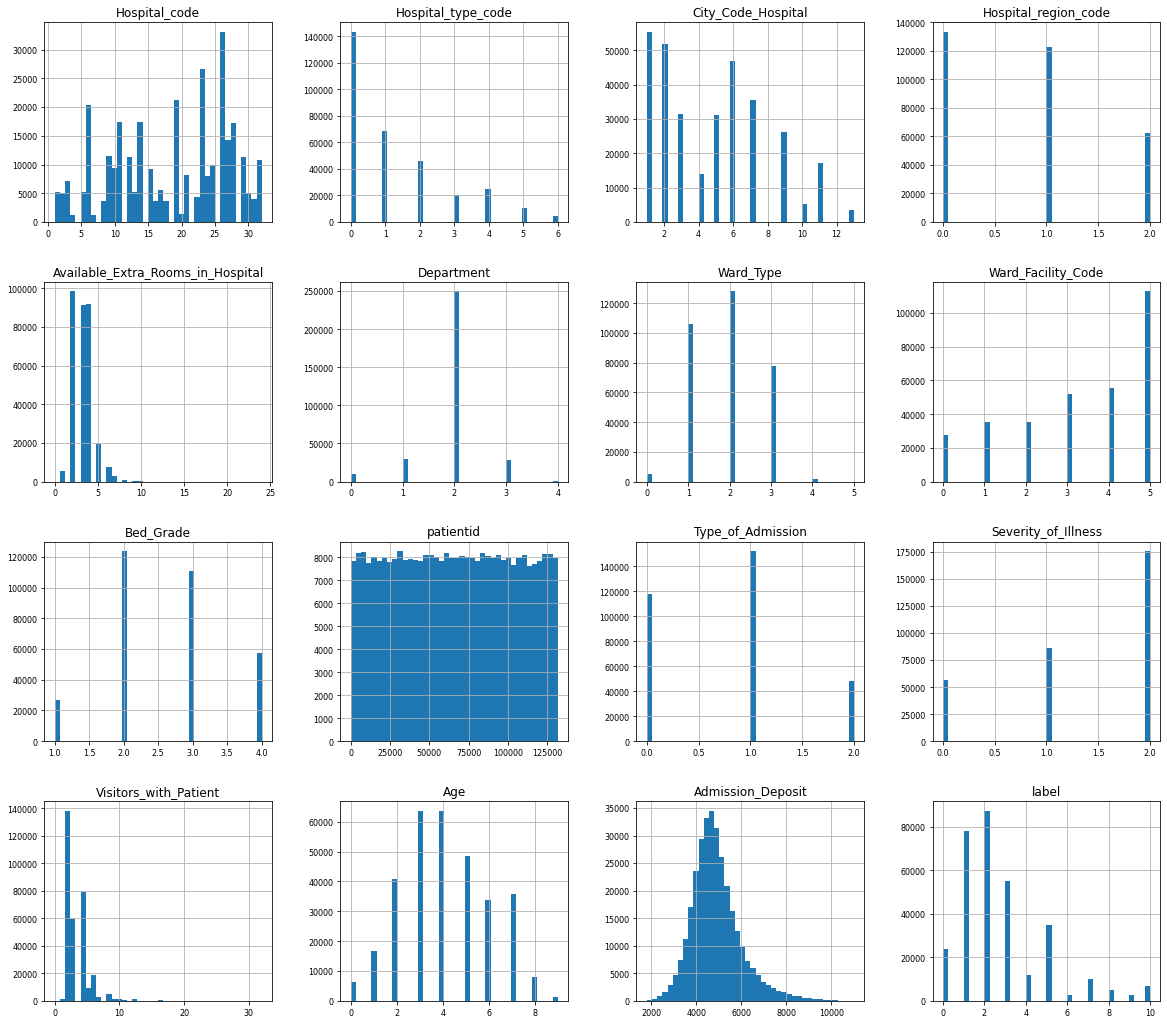

In [ ]:
df_train.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

Mapa de calor de la correlación entre características

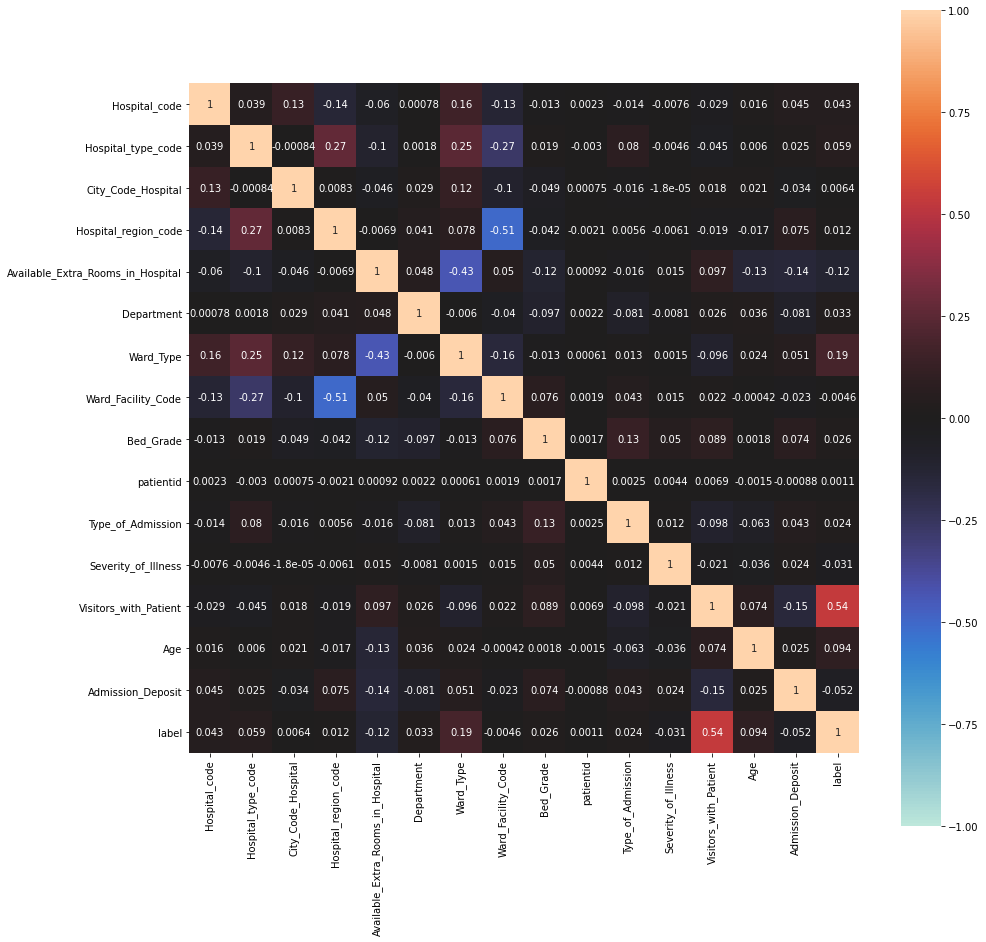

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_train.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Histograma comparativo de las variables con alta correlacióón y/o de interés

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


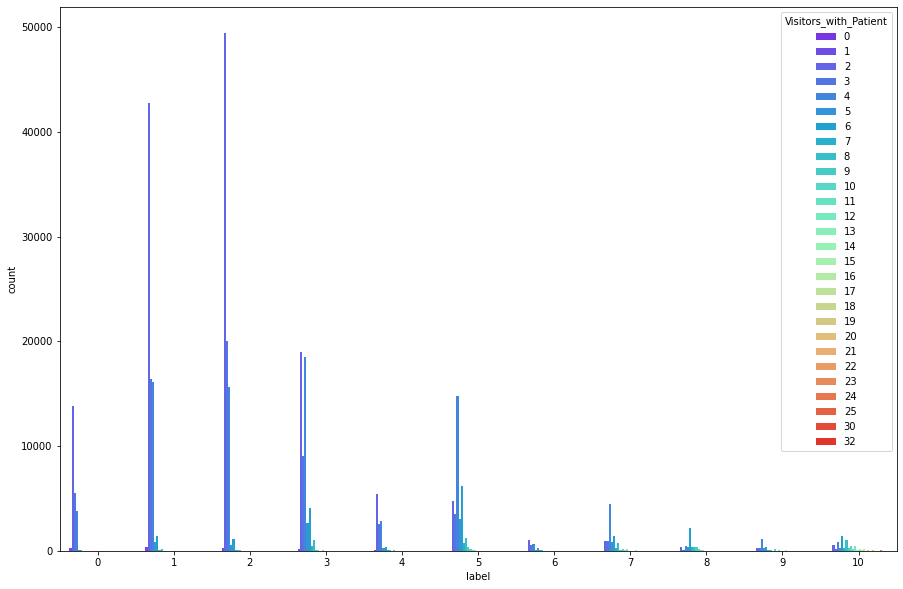

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['label'],hue=df_train['Visitors_with_Patient'],palette='rainbow', )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


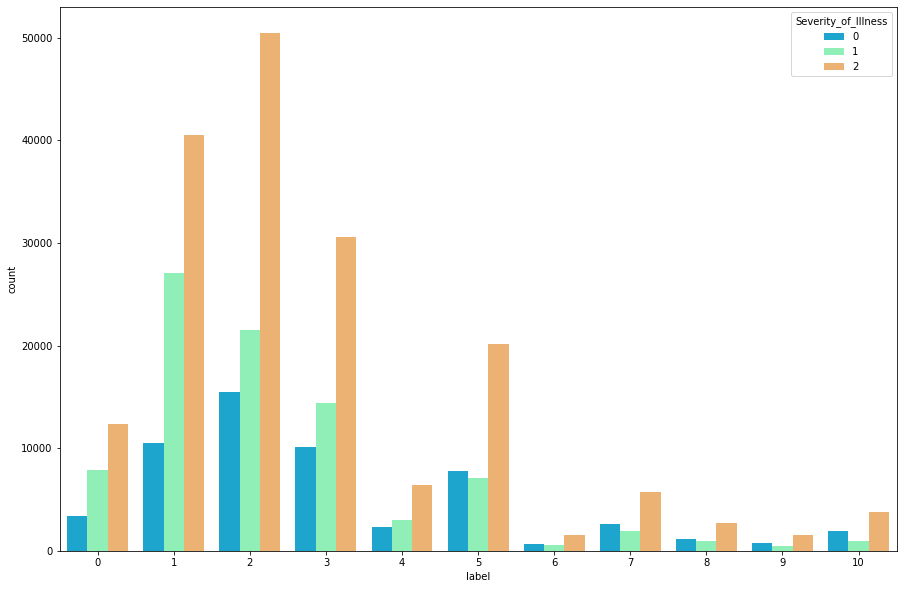

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['label'],hue=df_train['Severity_of_Illness'],palette='rainbow', )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


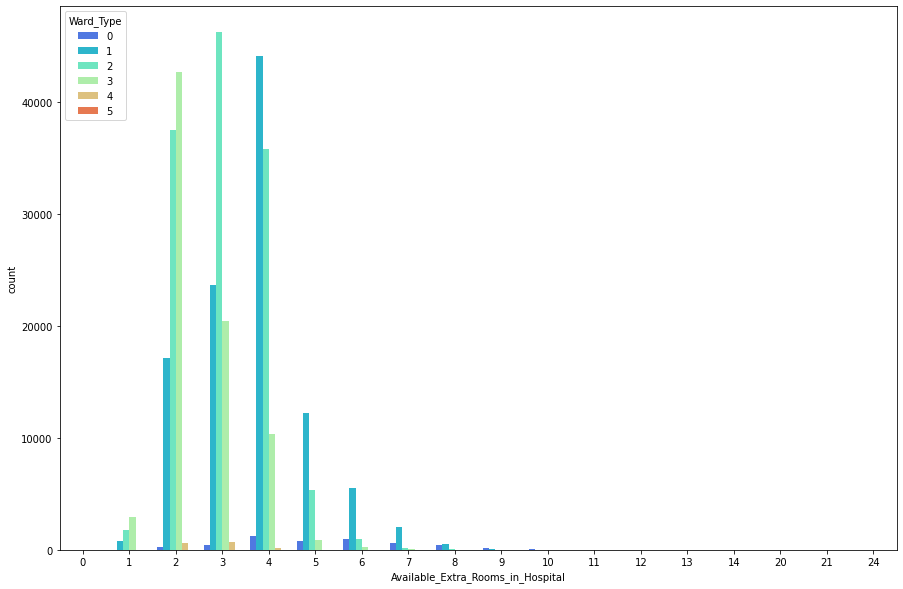

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Available_Extra_Rooms_in_Hospital'],hue=df_train['Ward_Type'],palette='rainbow', )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


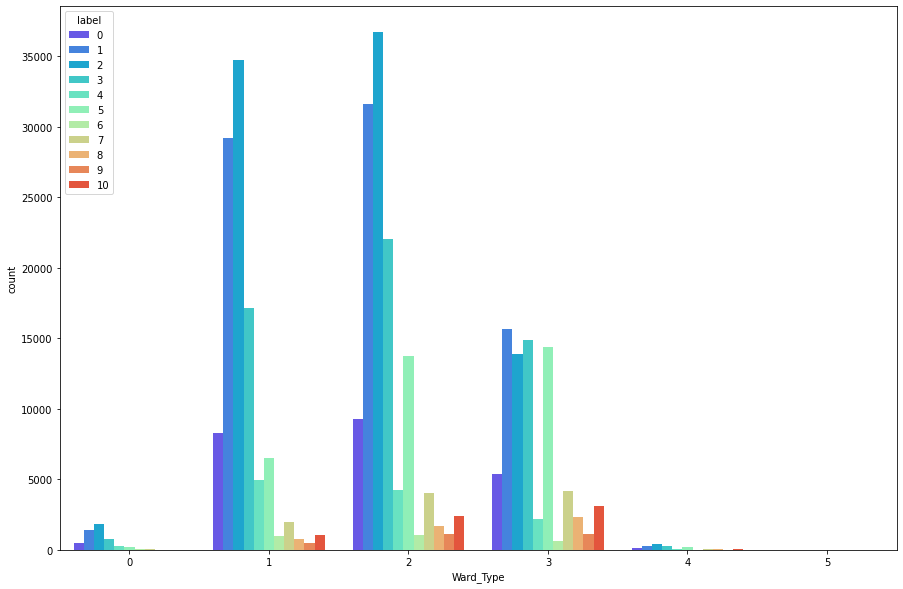

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Ward_Type'],hue=df_train['label'],palette='rainbow', )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


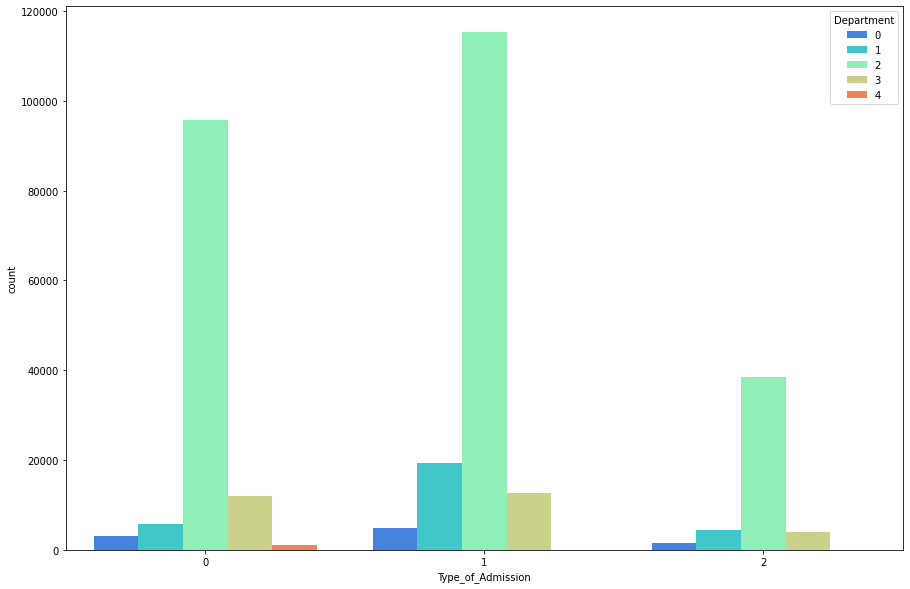

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Type_of_Admission'],hue=df_train['Department'],palette='rainbow')
plt.show()

Diagramas de cajas

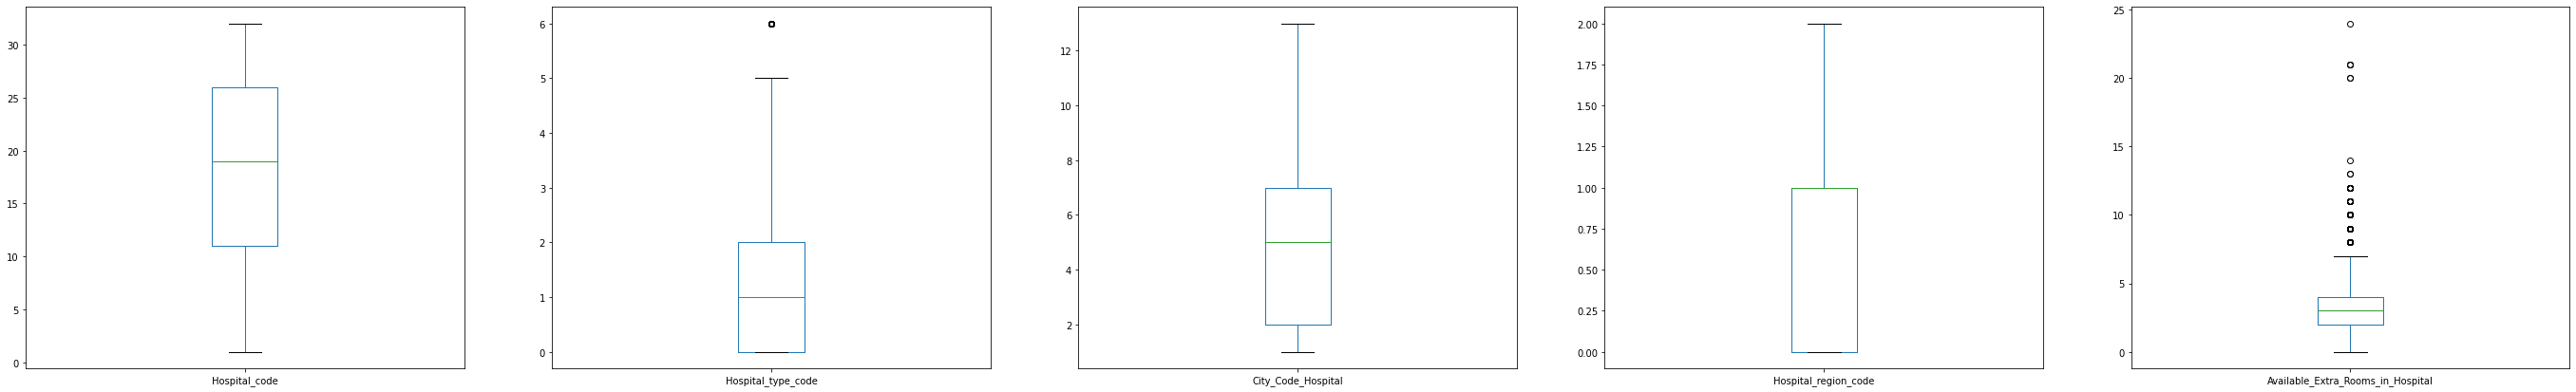

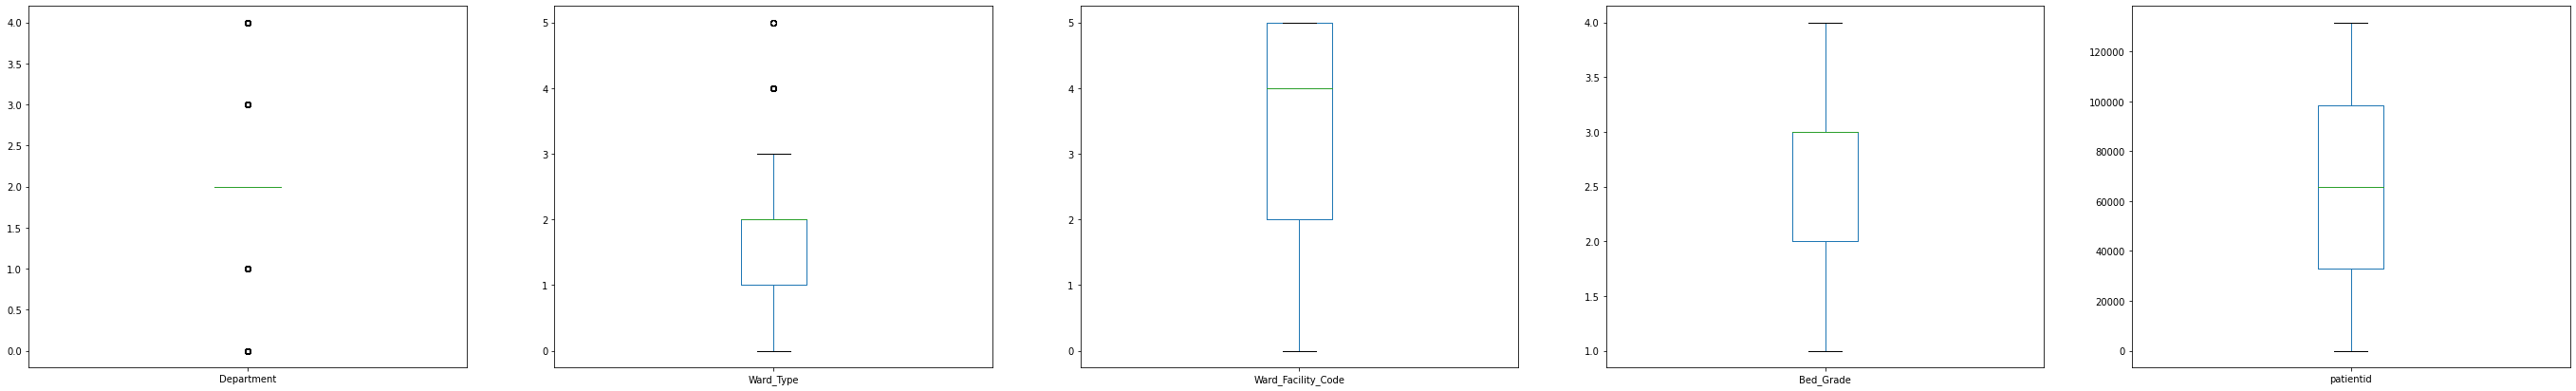

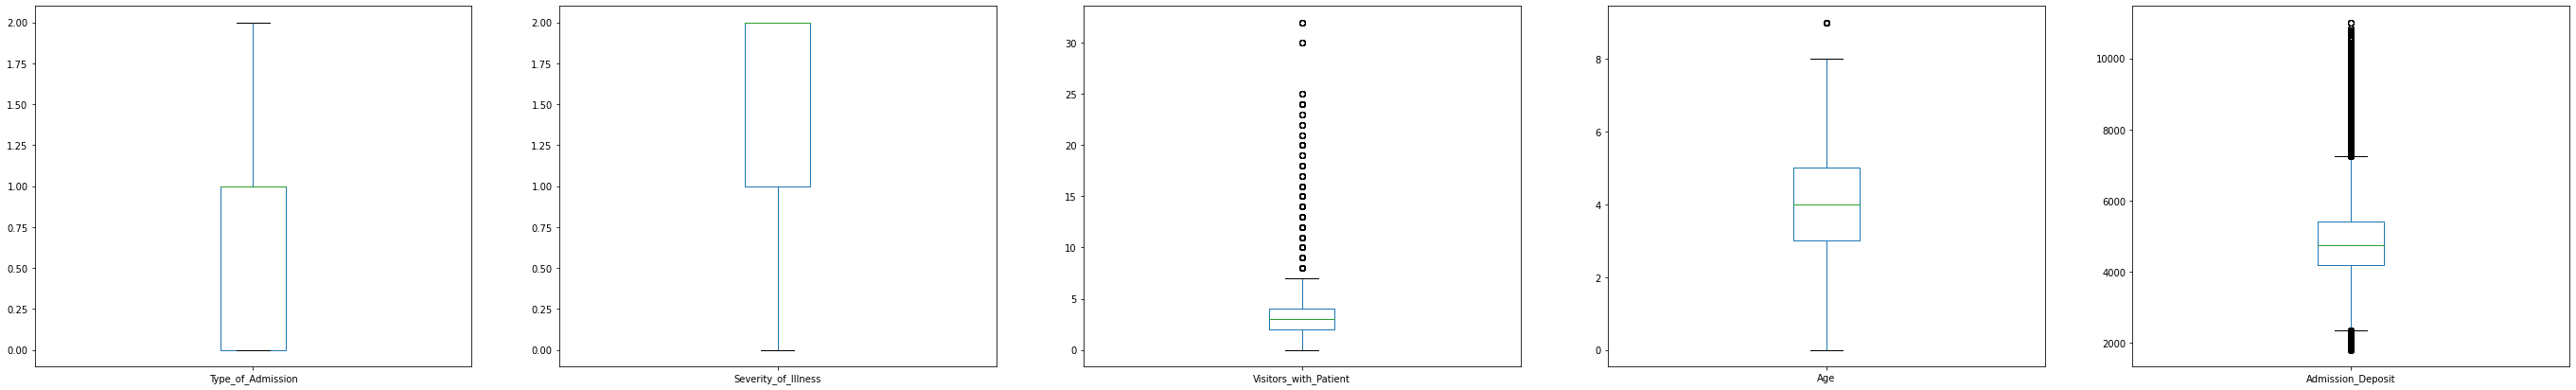

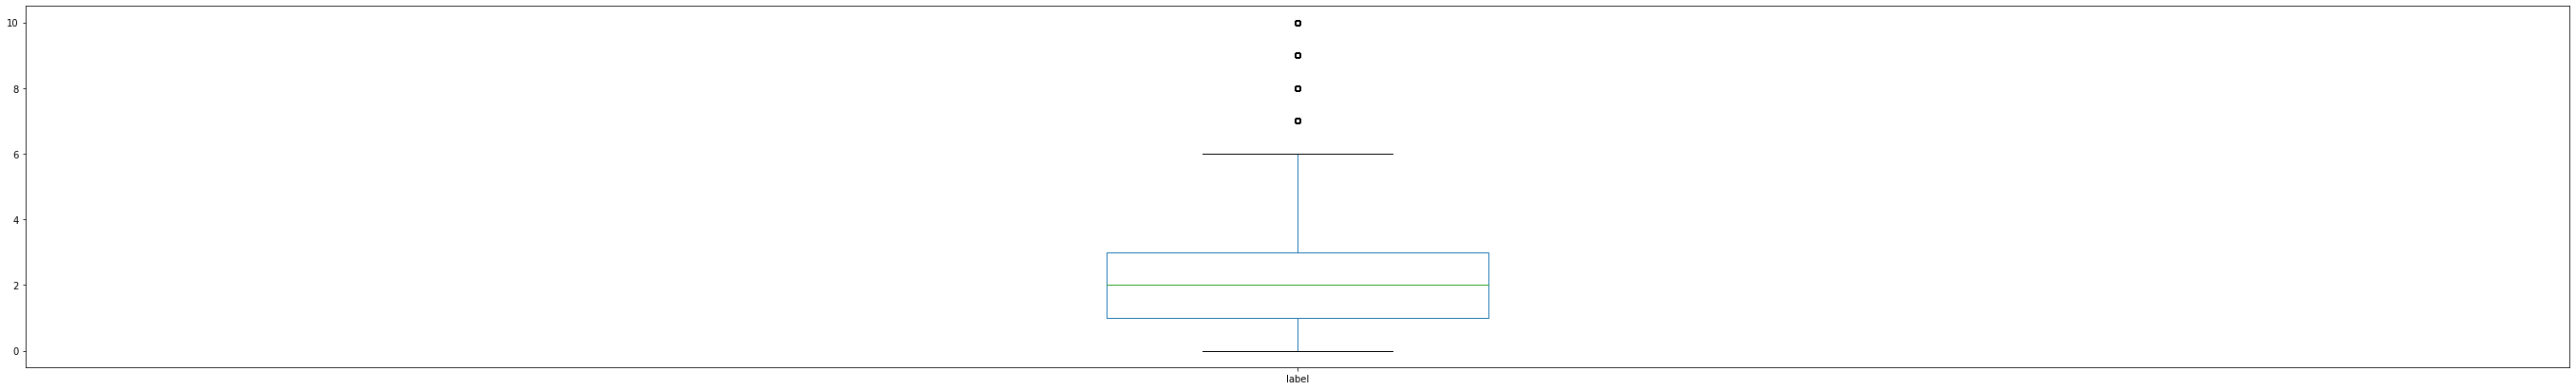

In [ ]:
for x in range(int(df_train.shape[1]/5) + 1):
    df_train.iloc[:,x*5:(x + 1)*5].plot(kind='box',subplots=True, sharex=False, sharey=False, figsize=(48,7))
    plt.show()

Scatter plots

In [ ]:
def pair_plots(variable, data = df_train ):
    for x in range(int(data.shape[0]/5) + 1):
        try:
            sns.pairplot(data=data, x_vars = data.iloc[:,x*5:(x + 1)*5].columns.values.tolist(), y_vars = [variable])
            plt.show()
        except ValueError:
            break

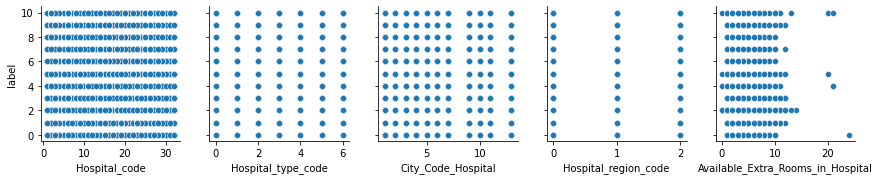

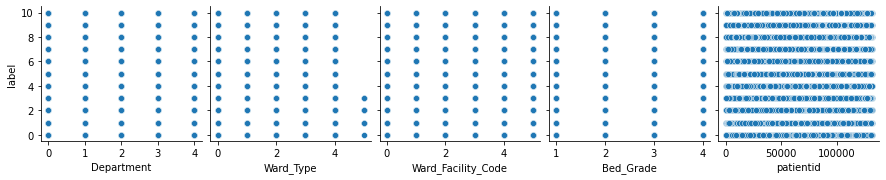

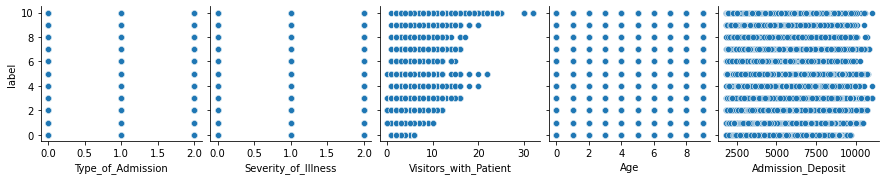

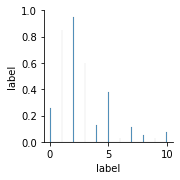

In [ ]:
pair_plots("label")

Feature Selection


As city code patient records has lot of NaN and I think these records are not so important I am removing it

In [ ]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,label
case_id,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2,31397,0,0,2,5,4911,0
2,2,2,5,2,2,3,3,5,2,31397,1,0,2,5,5954,4
3,10,4,1,0,2,1,3,4,2,31397,1,0,2,5,4745,3
4,26,1,2,1,2,3,2,3,2,31397,1,0,2,5,7272,4
5,26,1,2,1,2,3,3,3,2,31397,1,0,2,5,5558,4


In [ ]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,label
case_id,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2,31397,0,0,2,5,4911,0
2,2,2,5,2,2,3,3,5,2,31397,1,0,2,5,5954,4
3,10,4,1,0,2,1,3,4,2,31397,1,0,2,5,4745,3
4,26,1,2,1,2,3,2,3,2,31397,1,0,2,5,7272,4
5,26,1,2,1,2,3,3,3,2,31397,1,0,2,5,5558,4


Class=0, n=23604 (7.412%)
Class=4, n=11743 (3.688%)
Class=3, n=55159 (17.322%)
Class=1, n=78139 (24.538%)
Class=5, n=35018 (10.997%)
Class=2, n=87491 (27.475%)
Class=7, n=10254 (3.220%)
Class=10, n=6683 (2.099%)
Class=8, n=4838 (1.519%)
Class=6, n=2744 (0.862%)
Class=9, n=2765 (0.868%)


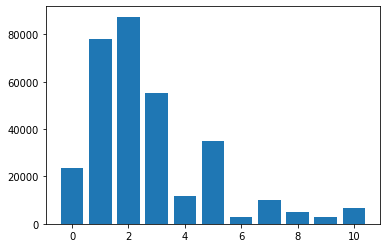

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# load the csv file as a data frame
df = df_train#.drop(columns=["patientid","Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Ward_Facility_Code"])
data = df.values

X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=87491 (9.091%)
Class=4, n=87491 (9.091%)
Class=3, n=87491 (9.091%)
Class=1, n=87491 (9.091%)
Class=5, n=87491 (9.091%)
Class=2, n=87491 (9.091%)
Class=7, n=87491 (9.091%)
Class=10, n=87491 (9.091%)
Class=8, n=87491 (9.091%)
Class=6, n=87491 (9.091%)
Class=9, n=87491 (9.091%)


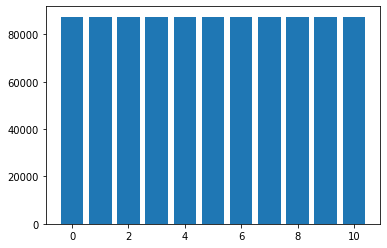

In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
df = pd.DataFrame(X, columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'])
df['label'] = y

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962401 entries, 0 to 962400
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Hospital_code                      962401 non-null  int64
 1   Hospital_type_code                 962401 non-null  int64
 2   City_Code_Hospital                 962401 non-null  int64
 3   Hospital_region_code               962401 non-null  int64
 4   Available Extra Rooms in Hospital  962401 non-null  int64
 5   Department                         962401 non-null  int64
 6   Ward_Type                          962401 non-null  int64
 7   Ward_Facility_Code                 962401 non-null  int64
 8   Bed Grade                          962401 non-null  int64
 9   patientid                          962401 non-null  int64
 10  Type of Admission                  962401 non-null  int64
 11  Severity of Illness                962401 non-null  int64
 12  Vi

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PMD/Hospital_SMOTE.csv')

In [ ]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,label
0,8,2,3,2,3,3,2,5,2,31397,0,0,2,5,4911,0
1,2,2,5,2,2,3,3,5,2,31397,1,0,2,5,5954,4
2,10,4,1,0,2,1,3,4,2,31397,1,0,2,5,4745,3
3,26,1,2,1,2,3,2,3,2,31397,1,0,2,5,7272,4
4,26,1,2,1,2,3,3,3,2,31397,1,0,2,5,5558,4


In [ ]:
df_n = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PMD/Hospital_SMOTE.csv')

In [ ]:
df_n.head()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,label
0,0,8,2,3,2,3,3,2,5,2,31397,0,0,2,5,4911,0
1,1,2,2,5,2,2,3,3,5,2,31397,1,0,2,5,5954,4
2,2,10,4,1,0,2,1,3,4,2,31397,1,0,2,5,4745,3
3,3,26,1,2,1,2,3,2,3,2,31397,1,0,2,5,7272,4
4,4,26,1,2,1,2,3,3,3,2,31397,1,0,2,5,5558,4


## Selección de características

In [61]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
case_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,F,2.0,31397,7.0,2,4911.0,0-10,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,c,5,Z,2,F,2.0,31397,7.0,2,5954.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,10,e,1,X,2,E,2.0,31397,7.0,2,4745.0,31-40,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,26,b,2,Y,2,D,2.0,31397,7.0,2,7272.0,41-50,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,26,b,2,Y,2,D,2.0,31397,7.0,2,5558.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
y = df_train.label
x = df_train.drop(columns=['Hospital_region_code', "patientid","Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Ward_Facility_Code",'label'])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
pd_extend = pd.DataFrame(x.values, columns=names)

x.head()

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
case_id,,,,,,,,,
1,3,3,2,2,0,0,2,5,4911
2,2,3,3,2,1,0,2,5,5954
3,2,1,3,2,1,0,2,5,4745
4,2,3,2,2,1,0,2,5,7272
5,2,3,3,2,1,0,2,5,5558


In [98]:
pd_extend.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8
0,3,3,2,2,0,0,2,5,4911
1,2,3,3,2,1,0,2,5,5954
2,2,1,3,2,1,0,2,5,4745
3,2,3,2,2,1,0,2,5,7272
4,2,3,3,2,1,0,2,5,5558


In [99]:
x.shape

(318438, 9)

In [100]:
pd_extend.shape

(318438, 9)

quitamos Hospital_region_code Department Bed_Grade 

### Chi-cuadrado

Text(0.5, 1.0, 'Estadístico chi cuadrado')

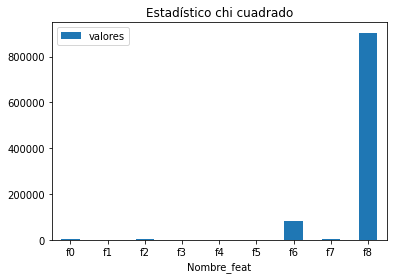

In [101]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
bestfeatures_Chi2 = SelectKBest(score_func=chi2, k=9)
fit_Chi2 = bestfeatures_Chi2.fit(x_train, y_train)

df_train.columns.values

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':pd_extend.columns, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PMD/chicuadrado.jpg')
plt.title("Estadístico chi cuadrado")

Según el estadístico chi cuadrado, tendríamos que elegir las características 6 y 8 para entrenar el modelo, es decir, **Visitor with Patient, Admission_Deposit**

### Información mutua

Text(0.5, 1.0, 'Información Mutua')

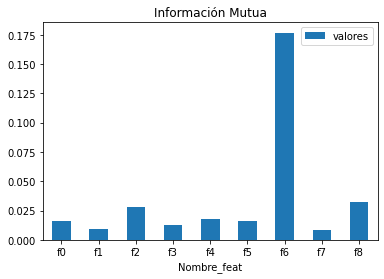

In [102]:
# Selección según información mútua, tras haber eliminado las variables constantes y las que están altamente correladas entre sí
# Consideramos las mismas características (en X_train) que con el estadístico chi cuadrado

# Selección de k características con Información Mútua
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=9)
fit_MI = bestfeatures_MI.fit(x_train, y_train)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':pd_extend.columns, 'valores':fit_MI.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PMD/inf_mutua.jpg')
plt.title("Información Mutua")

In [80]:
lista = ['Ward_Type','Visitors_with_Patient','Admission_Deposit', 'Available_Extra_Rooms_in_Hospital','Severity_of_Illness','Age']

Según el criterio de Información Mútua, tendríamos que elegir las características 2,6 y 8 para entrenar el modelo, es decir, **Ward_Type, Visitor with Patient, Admission_Deposit**

Catboost implementado por usuario de Kaggle

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
!pip install catboost

## Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.03,
                           depth=10,
                           l2_leaf_reg = 3,
                           loss_function='MultiClass',
                           eval_metric='MultiClass')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

Test Actual dataset

In [ ]:
print(cm)

In [ ]:
import catboost
pred = model.predict(
                 eval_dataset, 
                 verbose=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [ ]:
#df_sub = pd.DataFrame(index=df_test.index)
#df_sub["Stay"] = preds_class
#swap_dict_Stay = dict([(value, key) for key, value in dept_Stay.items()])
#df_sub["Stay"].replace(swap_dict_Stay, inplace=True)
#df_sub.head()

**Red neuronal entrenada con todas las características (excepto las que son códigos)**

## SMOTE (oversampling)

In [57]:
import imblearn

In [58]:
df_train_hot.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
case_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,F,2.0,31397,7.0,2,4911.0,0-10,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,c,5,Z,2,F,2.0,31397,7.0,2,5954.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,10,e,1,X,2,E,2.0,31397,7.0,2,4745.0,31-40,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,26,b,2,Y,2,D,2.0,31397,7.0,2,7272.0,41-50,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,26,b,2,Y,2,D,2.0,31397,7.0,2,5558.0,41-50,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Class=0, n=23604 (7.412%)
Class=4, n=11743 (3.688%)
Class=3, n=55159 (17.322%)
Class=1, n=78139 (24.538%)
Class=5, n=35018 (10.997%)
Class=2, n=87491 (27.475%)
Class=7, n=10254 (3.220%)
Class=10, n=6683 (2.099%)
Class=8, n=4838 (1.519%)
Class=6, n=2744 (0.862%)
Class=9, n=2765 (0.868%)


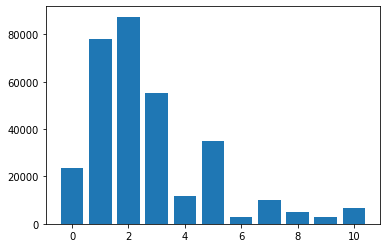

In [59]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# load the csv file as a data frame
df = df_train_hot.drop(columns=["patientid","Hospital_code", 'Hospital_region_code',"Hospital_type_code", "City_Code_Hospital", "Ward_Facility_Code",'City_Code_Patient'])
data_X = df.drop('Stay',1)
data_Y = df['Stay']
X = data_X.values
y = data_Y.values

#X, y = data.drop('Stay'), data['Stay']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=0, n=87491 (9.091%)
Class=4, n=87491 (9.091%)
Class=3, n=87491 (9.091%)
Class=1, n=87491 (9.091%)
Class=5, n=87491 (9.091%)
Class=2, n=87491 (9.091%)
Class=7, n=87491 (9.091%)
Class=10, n=87491 (9.091%)
Class=8, n=87491 (9.091%)
Class=6, n=87491 (9.091%)
Class=9, n=87491 (9.091%)


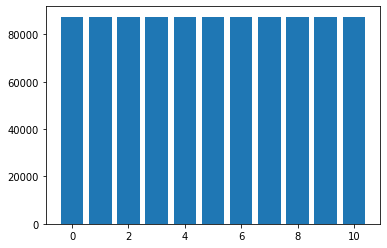

In [60]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Entrenamiento con todas las características despues de haber hecho SMOTE

## Red neuronal Keras

In [ ]:
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalizamos cada característica
X_norm = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
X_train_norm = scaler.transform(x_train)
X_test_norm = scaler.transform(x_test)

In [ ]:
print(y_train)

[6 6 9 ... 2 7 9]


In [ ]:
print(y_test)

[ 7 10  0 ... 10  9  6]


In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# load dataset

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
 
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(11, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 

In [ ]:
model = baseline_model()

history = model.fit(
  X_train_norm, dummy_y, batch_size = 512,
  epochs=200,validation_split=0.2, workers=-1)

Epoch 1/200
1203/1203 [==============================] - 6s 5ms/step - loss: 2.2464 - accuracy: 0.1749 - val_loss: 1.8518 - val_accuracy: 0.3287
Epoch 2/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.8880 - accuracy: 0.2947 - val_loss: 1.7484 - val_accuracy: 0.3451
Epoch 3/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.8143 - accuracy: 0.3245 - val_loss: 1.7032 - val_accuracy: 0.3561
Epoch 4/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7761 - accuracy: 0.3401 - val_loss: 1.6834 - val_accuracy: 0.3663
Epoch 5/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7547 - accuracy: 0.3480 - val_loss: 1.6623 - val_accuracy: 0.3740
Epoch 6/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7407 - accuracy: 0.3526 - val_loss: 1.6524 - val_accuracy: 0.3802
Epoch 7/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7278 - accuracy: 0.3583 - val_loss: 1.6451 - val_ac

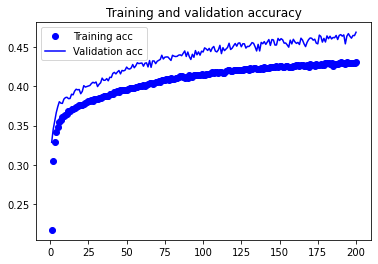

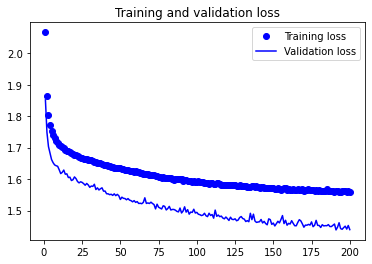

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test_norm, dummy_y_test)

6016/6016 [==============================] - 13s 2ms/step - loss: 1.4339 - accuracy: 0.4689


[1.4338650703430176, 0.4688722491264343]

In [ ]:
predictions = model.predict(X_test_norm)
predictions

array([[8.50776385e-04, 2.98088100e-02, 1.69985685e-02, ...,
        1.26854658e-01, 6.27118275e-02, 9.07590836e-02],
       [1.87823890e-09, 1.26692346e-08, 1.02407567e-08, ...,
        1.04157664e-02, 8.07211734e-03, 9.23414350e-01],
       [7.81233370e-01, 2.02093348e-02, 2.26784818e-04, ...,
        7.19414558e-04, 6.06186921e-04, 9.30599170e-04],
       ...,
       [1.12118315e-08, 2.69746980e-08, 4.78785411e-09, ...,
        2.07507964e-02, 3.87442172e-01, 5.00361860e-01],
       [1.09181474e-06, 3.36292987e-06, 2.72202186e-07, ...,
        3.88445258e-02, 4.66540813e-01, 3.25130045e-01],
       [2.75622457e-02, 1.35604735e-03, 1.63162586e-05, ...,
        6.09569950e-04, 1.56026753e-03, 1.12153043e-03]], dtype=float32)

In [ ]:
print(y_test.shape)
print(predictions.shape)

(192481,)
(192481, 11)


[[10145  2734  2793    37  1222    14   424    43     1    33     7]
 [ 1234  5429  8957   678   458   546   113    51    39    17     1]
 [  319  4401 12374   243     0   185     2     1   115     1     6]
 [ 1372  1563  5462  2050  1345  3156   625  1221   364   331    62]
 [ 4082   653  2846   269  4807   357  3217   599   238   376    70]
 [  701   387  1398  1584   449  4748   740  3849  2048  1241   181]
 [ 1047    71  1141   100  2055   222 11329   558   419   585    48]
 [  550   103   467   465   266  2405  1027  5680  1975  3426  1013]
 [  320    37   137    50    62   562   452   741 13941   631   570]
 [  220    22   199    64    74   900   522  2086   847 11907   548]
 [  276    31   183    80    67   585   536  1047  5279  1700  7839]]


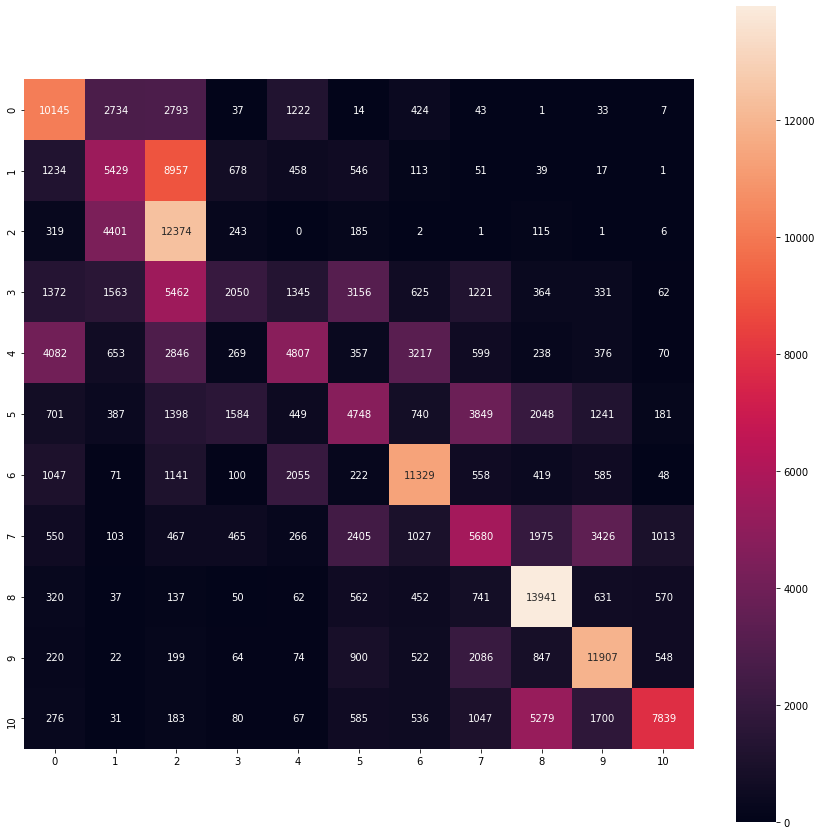

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_norm)


matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PMD/correlacion_confusion.jpg")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52     17453
           1       0.33      0.52      0.40     17523
           2       0.35      0.50      0.41     17647
           3       0.32      0.08      0.13     17551
           4       0.43      0.26      0.33     17514
           5       0.34      0.34      0.34     17326
           6       0.51      0.59      0.55     17575
           7       0.33      0.28      0.30     17377
           8       0.52      0.78      0.63     17503
           9       0.52      0.53      0.52     17389
          10       0.69      0.42      0.52     17623

    accuracy                           0.44    192481
   macro avg       0.44      0.44      0.42    192481
weighted avg       0.44      0.44      0.42    192481



**Entrenado con características estadístico chi cuadrado e información mutua**

In [82]:
lista

['Ward_Type',
 'Visitors_with_Patient',
 'Admission_Deposit',
 'Available_Extra_Rooms_in_Hospital',
 'Severity_of_Illness',
 'Age']

In [81]:
df_train_hot.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient',
       'Visitors with Patient', 'Admission_Deposit', 'Stay',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Severity of Illness_Extreme',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate', 'Age_0-10',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],
      dtype='object')

Class=0, n=23604 (7.412%)
Class=4, n=11743 (3.688%)
Class=3, n=55159 (17.322%)
Class=1, n=78139 (24.538%)
Class=5, n=35018 (10.997%)
Class=2, n=87491 (27.475%)
Class=7, n=10254 (3.220%)
Class=10, n=6683 (2.099%)
Class=8, n=4838 (1.519%)
Class=6, n=2744 (0.862%)
Class=9, n=2765 (0.868%)


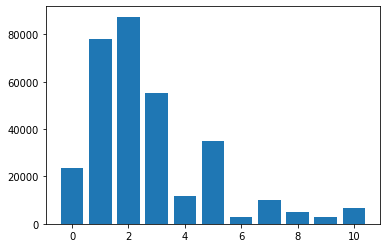

In [83]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# load the csv file as a data frame
df = df_train_hot.drop(columns=["patientid","Hospital_code", 'Hospital_region_code',"Hospital_type_code", "City_Code_Hospital", "Ward_Facility_Code",'City_Code_Patient','Bed Grade','Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery','Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent'])
data_X = df.drop('Stay',1)
data_Y = df['Stay']
X = data_X.values
y = data_Y.values

#X, y = data.drop('Stay'), data['Stay']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=87491 (9.091%)
Class=4, n=87491 (9.091%)
Class=3, n=87491 (9.091%)
Class=1, n=87491 (9.091%)
Class=5, n=87491 (9.091%)
Class=2, n=87491 (9.091%)
Class=7, n=87491 (9.091%)
Class=10, n=87491 (9.091%)
Class=8, n=87491 (9.091%)
Class=6, n=87491 (9.091%)
Class=9, n=87491 (9.091%)


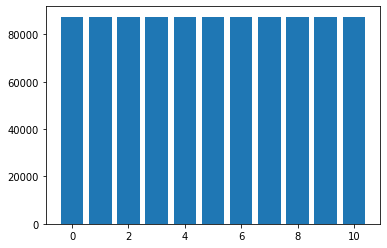

In [84]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [85]:
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalizamos cada característica
X_norm = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
X_train_norm = scaler.transform(x_train)
X_test_norm = scaler.transform(x_test)

In [86]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# load dataset

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
 
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(11, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 

In [87]:
model = baseline_model()

history = model.fit(
  X_train_norm, dummy_y, batch_size = 512,
  epochs=200, validation_split = 0.2)

Epoch 1/200
1203/1203 [==============================] - 7s 5ms/step - loss: 2.2468 - accuracy: 0.1747 - val_loss: 1.8688 - val_accuracy: 0.3017
Epoch 2/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.9073 - accuracy: 0.2794 - val_loss: 1.7903 - val_accuracy: 0.3236
Epoch 3/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.8353 - accuracy: 0.3104 - val_loss: 1.7440 - val_accuracy: 0.3393
Epoch 4/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.8072 - accuracy: 0.3224 - val_loss: 1.7317 - val_accuracy: 0.3441
Epoch 5/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7938 - accuracy: 0.3271 - val_loss: 1.7206 - val_accuracy: 0.3546
Epoch 6/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7837 - accuracy: 0.3326 - val_loss: 1.6959 - val_accuracy: 0.3585
Epoch 7/200
1203/1203 [==============================] - 5s 4ms/step - loss: 1.7717 - accuracy: 0.3384 - val_loss: 1.6911 - val_ac

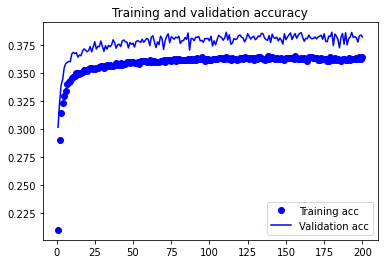

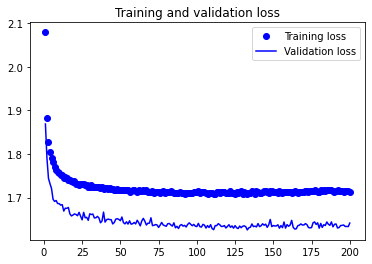

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [89]:
model.evaluate(X_test_norm, dummy_y_test)

6016/6016 [==============================] - 13s 2ms/step - loss: 1.6396 - accuracy: 0.3838


[1.6395827531814575, 0.3838456869125366]

In [90]:
predictions = model.predict(X_test_norm)
predictions

array([[1.6433181e-03, 4.6880938e-02, 1.0858045e-02, ..., 7.3429793e-02,
        8.5395940e-02, 5.0859995e-02],
       [1.2683885e-06, 1.3481049e-05, 6.7988249e-06, ..., 8.7967910e-02,
        1.3306569e-01, 6.1118752e-01],
       [1.8439688e-01, 8.6446814e-02, 8.4525518e-02, ..., 5.1037896e-02,
        4.5386892e-02, 4.2034738e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3024068e-14,
        9.2555474e-08, 9.9999988e-01],
       [3.7061636e-04, 4.4429806e-05, 2.0263196e-06, ..., 8.0470800e-02,
        3.7236351e-01, 2.3260516e-01],
       [1.7401007e-03, 6.0696945e-02, 2.0593513e-02, ..., 1.2276463e-01,
        7.2545610e-02, 7.0511073e-02]], dtype=float32)

In [91]:
print(y_test.shape)
print(predictions.shape)

(192481,)
(192481, 11)


In [92]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_norm)




[[ 7666  1837  5092     8  1758    32  1035     0     0    25     0]
 [  995  3595 11206   263   314   956   108     9    37    39     1]
 [  290  2675 14160    67     5   305     2     0   138     0     5]
 [ 1516   987  6394   948   959  4814   608   316   332   636    41]
 [ 3963   467  3667   103  3643   618  3826   133   264   772    58]
 [  856   229  1689   673   258  7342   783  1001  2186  2247    62]
 [ 1921    89  1655    50  2240   762  7276   232  1155  2088   107]
 [  641    64   608   233   114  4410  1173  1324  2286  5690   834]
 [  293    17   159    42    26  1165   581   200 13359  1364   297]
 [  391    19   332    53    61  2363  1250   895  2119  8630  1276]
 [  400    12   214    28    28  1047   673   210  6693  2378  5940]]


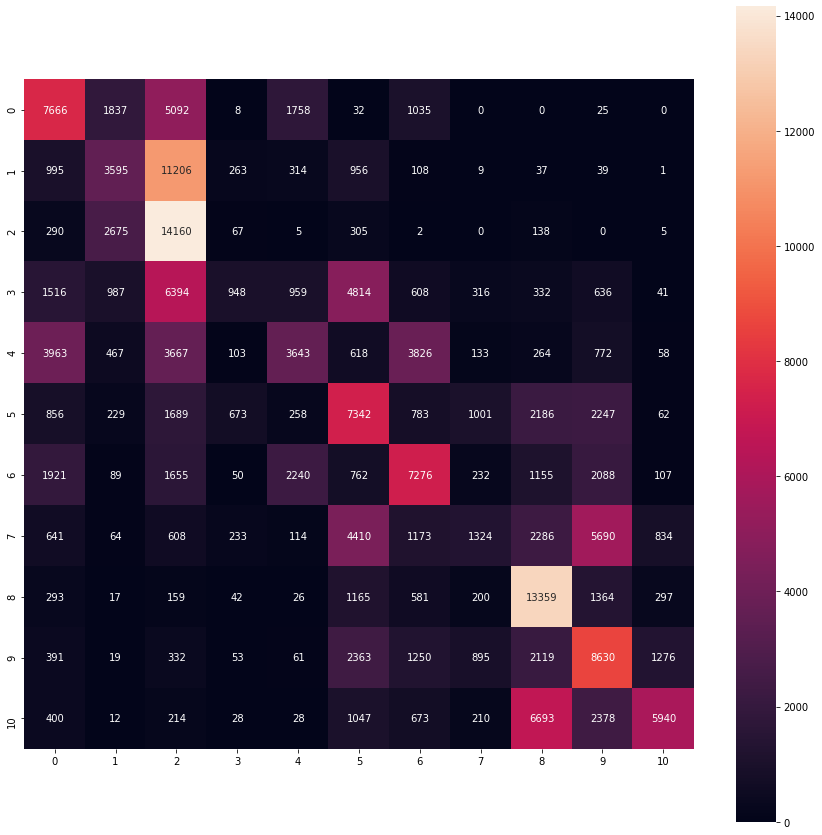

In [94]:
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(matrix)
plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PMD/correlacion_confusion_chi_im.jpg")
plt.show()